In [1]:
import numpy as np
import pandas as pd




act = pd.read_csv('MDA_act_10min.csv')
act.shape


(4327, 8)

In [69]:
ABSENCE = 0 # 부재
NOT_ACT = 1 # 미활동
QUIVER = 2 # 미동
ACT = 3 # 활동
CAUTION = 4 #주의
FALL = 5 # 낙상


def getEmergencyLabel(status, defaultStatus):
    if status == "fall_detected" or status == "fall_exit" or status == "fall_confirmed":
        return CAUTION
    elif status == "calling" or status == "finished":
        return FALL
    else:
        return defaultStatus

def makeStatus(df):
#     print(df.avg_people_cnt)
#     print(df['avg_people_cnt'])
    if df['avg_people_cnt'] == 0:
#         return df['activity_key'], ABSENCE
        return ABSENCE
    else:
        act_label = ABSENCE
        if df['avg_activity'] < 3.0 or df['max_activity'] < 20.0:
            act_label = NOT_ACT
        elif df['avg_activity'] < 7.0 or df['max_activity'] < 40.0:
            act_label = QUIVER
        else:
            act_label = ACT
        
    act_label = getEmergencyLabel(df['lastStatus'], act_label)
#     return df['activity_key'], act_label
    return act_label
    

act['act_label']  = act.apply(makeStatus, axis=1)


In [70]:
act[40:70]

,activity_key,avg_presence,avg_people_cnt,avg_activity,max_activity,cnt,first_eventtime,lastStatus,act_label
40,2769970,0,0.0,0.000000,0.0000,0,NaN,NaN,0
41,2769971,0,0.0,0.000000,0.0000,0,NaN,NaN,0
42,2769972,1,1.0,5.181717,32.2318,24,NaN,NaN,2
43,2769973,0,0.0,0.000000,0.0000,0,NaN,NaN,0
44,2769974,0,0.0,0.000000,0.0000,0,NaN,NaN,0
45,2769975,1,1.0,0.013244,0.1192,9,NaN,NaN,1
46,2769976,0,0.0,0.000000,0.0000,0,NaN,NaN,0
47,2769977,0,0.0,0.000000,0.0000,0,NaN,NaN,0
48,2769978,1,1.0,0.000000,0.0000,1,NaN,NaN,1
49,2769979,0,0.0,0.000000,0.0000,0,NaN,NaN,0


In [71]:
# 각 상태별 누적수를 구함.
act.groupby('act_label')['act_label'].count()

act_label
0    1564
1    1163
2     948
3     567
4      82
5       3
Name: act_label, dtype: int64

In [94]:
new1 = act.groupby('act_label')['act_label'].size()
new1

act_label
0    1564
1    1163
2     948
3     567
4      82
5       3
Name: act_label, dtype: int64

<AxesSubplot: xlabel='act_label'>

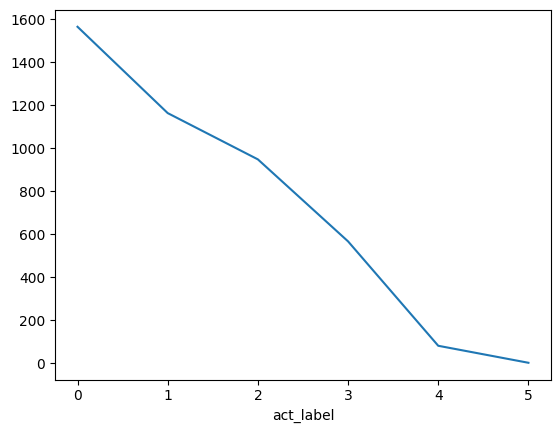

In [96]:
new1.plot()

<AxesSubplot: xlabel='act_label'>

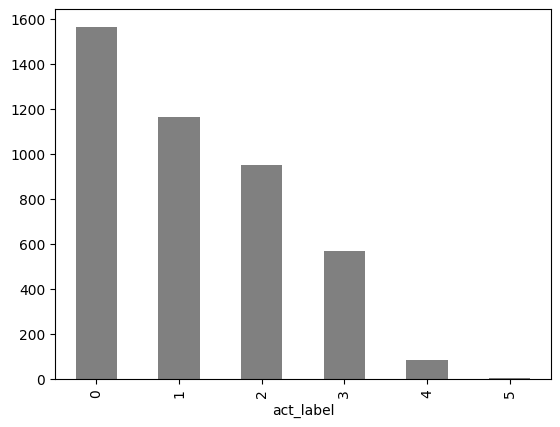

In [100]:
x_ticks = list(new1.keys())

new1.plot.bar(xticks=x_ticks, stacked=True, color='0.5')

In [127]:
# act2 = pd.read_csv('stackedbar.csv', index_col=0)
act2 = pd.read_csv('stackedbar.csv')
act2.head()


,id,act,cnt
0,id_MzQ6QUI6OTU6NzE6QTE6MDA,0,1564
1,id_MzQ6QUI6OTU6NzE6QTE6MDA,1,1163
2,id_MzQ6QUI6OTU6NzE6QTE6MDA,2,948
3,id_MzQ6QUI6OTU6NzE6QTE6MDA,3,567
4,id_MzQ6QUI6OTU6NzE6QTE6MDA,4,82


In [128]:

pivot_df = act2.pivot(index='id', columns='act', values='cnt')
pivot_df


act,0,1,2,3,4,5
id,,,,,,
id_MzQ6QUI6OTU6NzE6QTE6BBB,300,200,100,100,100,100
id_MzQ6QUI6OTU6NzE6QTE6MDA,1564,1163,948,567,82,3


<AxesSubplot: xlabel='id'>

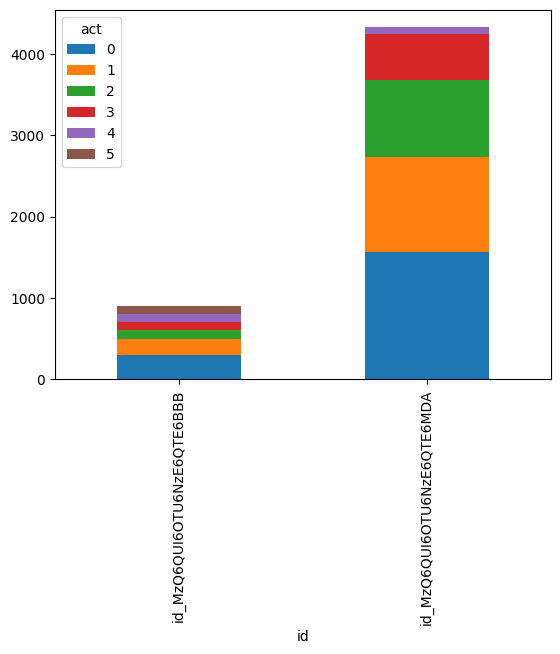

In [129]:
pivot_df.plot.bar(stacked=True)